In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Основы работы библиотеки NetworkX

Данный раздел составлен с использованием материалов  [туториала для библиотеки NetworkX](http://networkx.github.io/documentation/latest/tutorial/tutorial.html) и рассматривает некоторые аспекты работы с графами.

Возможности библиотеки

Библиотека networkX создана на языке Python и предназначена для работы с графами и другими сетевыми структурами. Это свободное ПО распространяемое под новой BSD лицензией.

Основные возможности библиотеки:

* Классы для работы с простыми, ориентированными и взвешенными графами;
* Узлом может быть практически что угодно: time-series, текст, изображение, XML;
* Сохранение / загрузка графов в/из наиболее распространённых форматов файлов хранения графов;
* Встроенные процедуры для создания графов базовых типов;
* Методы для обнаружения подграфов, клик и К-дольных графов (K-core) ( максимальный подграф в котором каждая вершина имеет по крайней мере уровень К ).
* Получение таких характеристик графа как степени вершин, высота графа, диаметр, радиус, длинны путей, центр, промежуточности, и т. д.;
* Визуализировать сети в виде 2D и 3D графиков;

В качестве базового формата хранения данных библиотека использует систему "словарь словарей" - что позволяет эффективно работать с памятью и обрабатывать большие графы.

### Базовые операции с вершинами и ребрами

#### Создание графа

Библиотека подключается с помощью команды `import`:

In [2]:
>>> import networkx as nx

В данном случае мы импортировали networx с синонимом nx, который будем использьовать для простоты и читаемости кода.

Последовательность команд:

In [3]:
>>> G=nx.Graph()

Создает пустого граф, без вершин и ребер.

В самом общем случае граф представляет собой набор вершин (узлов, точек) и связей между ними. Библиотека networkx может рассматривать как набор вершин любой хэшируемый объект - то есть любой объект, который можно представить итерируемой последовательностью - список, строку, XML-файл, картинку и так далее.

#### Вершины

Добавить вершины к графу G можно несколькими путями. Networkx включает в себя несколько разных возможностей, однако мы начнем рассмотрение с наиболее простого случая - добавления вершин по одной. Список уже добавленных вершин можно посмотреть следующим образом:

In [4]:
>>> G.nodes()

NodeView(())

Добавим одну вершину:

In [5]:
>>> G.add_node(1)

In [6]:
>>> G.nodes()

NodeView((1,))

Несколько вершин можно добавить при помощи списка:

In [7]:
>>> G.add_nodes_from([2,3])

In [8]:
>>> G.nodes()

NodeView((1, 2, 3))

Можно добавить любое количество вершин "оптом", включая другие графы:

In [9]:
>>> H=nx.path_graph(10)

In [10]:
>>> H.nodes()

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9))

In [11]:
>>> G.nodes()

NodeView((1, 2, 3))

In [12]:
>>> G.add_nodes_from(H)

In [13]:
>>> G.nodes()

NodeView((1, 2, 3, 0, 4, 5, 6, 7, 8, 9))

Обратите внимание, что сейчас граф G содержит подграф H. Можно включить и граф G в граф H:

In [14]:
>>> G.add_node(H)

In [15]:
>>> G.nodes()

NodeView((1, 2, 3, 0, 4, 5, 6, 7, 8, 9, <networkx.classes.graph.Graph object at 0x7f987f543eb8>))

Теперь граф G содержит H, как отдельный узел. Такая гибкость очень полезна, поскольку позволяет создавать графы, включающие в себя графы, графы включающие в себя файлы, функции и многое другое.


#### Ребра

Добавление ребер (связей между вершинами) выполняется аналогично добавлению вершин. Это можно сделать либо по одному ребру за раз, либо с помощью распаковки хэшей:

In [16]:
>>> G.add_edge(1,2)

Список добавленных ребер можно посмотреть при помощи следующей команды:

In [17]:
>>> G.edges()

EdgeView([(1, 2)])

Теперь создадим хэш ребер, а затем - распакуем его:

In [18]:
>>> e=(2,3)
>>> G.add_edge(*e) # распаковка кортежа вершин

In [19]:
>>> G.edges()

EdgeView([(1, 2), (2, 3)])

Добавление ребер из списка проходит так:

In [20]:
>>> G.add_edges_from([(1,2),(1,3)])

In [21]:
>>> G.edges()

EdgeView([(1, 2), (1, 3), (2, 3)])

#### Удаление вершин и ребер

Удаление вершин и связей производится с помощью аналогичных функций: Graph.remove_node(), Graph.remove_nodes_from(), Graph.remove_edge() и Graph.remove_edges_from() и так далее

In [22]:
>>> G.nodes()

NodeView((1, 2, 3, 0, 4, 5, 6, 7, 8, 9, <networkx.classes.graph.Graph object at 0x7f987f543eb8>))

In [23]:
>>> G.remove_node(H)

In [24]:
>>> G.nodes()

NodeView((1, 2, 3, 0, 4, 5, 6, 7, 8, 9))

In [25]:
>>> G.edges()

EdgeView([(1, 2), (1, 3), (2, 3)])

In [26]:
>>> G.remove_edge(1,3)

In [27]:
>>> G.edges()

EdgeView([(1, 2), (2, 3)])

Защиты от добавления уже существующих вершин или ребер нет. То есть, например, после очистки графа:

In [28]:
>>> G.clear()

In [29]:
>>> G.nodes()

NodeView(())

In [30]:
>>> G.edges()

EdgeView([])

Можно добавить в него следующие вершины:

In [31]:
>>> G.add_edges_from([(1,2),(1,3)])
>>> G.add_node(1)
>>> G.add_edge(1,2)
>>> G.add_node("spam")       # добавляет вершину "spam"
>>> G.add_nodes_from("spam") # добавляет четыре вершины: 's', 'p', 'a', 'm'

После этих операций граф G будет содержать 8 вершин и 2 ребра. Это можно увидеть с помощью следующих команд:

In [32]:
>>> G.number_of_nodes()

8

In [33]:
>>> G.number_of_edges()

2

Полностью списки вершин и ребер можно просмотреть так:

In [34]:
>>> G.nodes()

NodeView((1, 2, 3, 'spam', 's', 'p', 'a', 'm'))

In [35]:
>>> G.edges()

EdgeView([(1, 2), (1, 3)])

Так же можно определить соседей конкретной вершины.

In [36]:
>>> G.neighbors(1)

Обратите внимание, что соседи вершины выдаются в виде списка.

Удаление вершин производится аналогично добавлению - с помощью функций:

In [37]:
>>> G.remove_nodes_from("spam")

In [38]:
>>> G.nodes()

NodeView((1, 2, 3, 'spam'))

In [39]:
>>> G.remove_edge(1,3)

In [40]:
>>> G.edges()

EdgeView([(1, 2)])

При создании графа, можно задавать данные в нескольких форматах:

In [41]:
>>> H=nx.DiGraph(G)   # создаем орграф с использованием неориентированного графа G

In [42]:
>>> H.nodes()

NodeView((1, 2, 3, 'spam'))

In [43]:
>>> H.edges()

OutEdgeView([(1, 2), (2, 1)])

In [44]:
>>> edgelist=[(0,1),(1,2),(2,3)]

In [45]:
>>> H=nx.Graph(edgelist)

In [46]:
>>> H.edges()

EdgeView([(0, 1), (1, 2), (2, 3)])

In [47]:
>>> H.nodes()

NodeView((0, 1, 2, 3))

### Генераторы графов и операции над графами

В дополнении к созданию графов путем простого добавления вершины-за-вершиной и ребра-за-ребром, их можно создавать несколькими путями:

```
subgraph(G, nbunch)      - добавляя вершины из nbunch в виде субграфа в граф G
union(G1,G2)             - объединение графов
disjoint_union(G1,G2)    - объединение графов с учетом того, что все вершины разные
cartesian_product(G1,G2) - возвращает прямое (декартово) произведение графов
compose(G1,G2)           - комбинирует графы, определяя общие для обоих вершины
complement(G)            - с помощью комплементации (дополнения) графа
create_empty_copy(G)     - возвращает пустую копию графа того же класса, что и G
convert_to_undirected(G) - возвращение к ненаправленному представлению графа G
convert_to_directed(G)   - возвращение к направленному представлению графа G
```

[Граф Петерсена](https://ru.wikipedia.org/wiki/%D0%93%D1%80%D0%B0%D1%84_%D0%9F%D0%B5%D1%82%D0%B5%D1%80%D1%81%D0%B5%D0%BD%D0%B0):

In [48]:
>>> petersen=nx.petersen_graph()

In [49]:
print(petersen.nodes())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [50]:
print(petersen.edges())

[(0, 1), (0, 4), (0, 5), (1, 2), (1, 6), (2, 3), (2, 7), (3, 4), (3, 8), (4, 9), (5, 7), (5, 8), (6, 8), (6, 9), (7, 9)]


[Граф Татта](https://ru.wikipedia.org/wiki/%D0%93%D1%80%D0%B0%D1%84_%D0%A2%D0%B0%D1%82%D1%82%D0%B0):

In [51]:
>>> tutte=nx.tutte_graph()

In [52]:
print(tutte.nodes())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45]


In [53]:
print(tutte.edges())

[(0, 1), (0, 2), (0, 3), (1, 4), (1, 26), (2, 10), (2, 11), (3, 18), (3, 19), (4, 5), (4, 33), (5, 6), (5, 29), (6, 7), (6, 27), (7, 8), (7, 14), (8, 9), (8, 38), (9, 10), (9, 37), (10, 39), (11, 12), (11, 39), (12, 13), (12, 35), (13, 14), (13, 15), (14, 34), (15, 16), (15, 22), (16, 17), (16, 44), (17, 18), (17, 43), (18, 45), (19, 20), (19, 45), (20, 21), (20, 41), (21, 22), (21, 23), (22, 40), (23, 24), (23, 27), (24, 25), (24, 32), (25, 26), (25, 31), (26, 33), (27, 28), (28, 29), (28, 32), (29, 30), (30, 31), (30, 33), (31, 32), (34, 35), (34, 38), (35, 36), (36, 37), (36, 39), (37, 38), (40, 41), (40, 44), (41, 42), (42, 43), (42, 45), (43, 44)]


И другие типы графов:

In [54]:
>>> maze=nx.sedgewick_maze_graph()

In [55]:
print(maze.nodes())

[0, 1, 2, 3, 4, 5, 6, 7]


In [56]:
print(maze.edges())

[(0, 2), (0, 7), (0, 5), (1, 7), (2, 6), (3, 4), (3, 5), (4, 5), (4, 7), (4, 6)]


In [57]:
>>> tet=nx.tetrahedral_graph()

In [58]:
print(tet.nodes())

[0, 1, 2, 3]


In [59]:
print(tet.edges())

[(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)]


    3. Используя генератор классических графов:

In [60]:
>>> K_5=nx.complete_graph(5)

In [61]:
>>> K_5.nodes()

NodeView((0, 1, 2, 3, 4))

In [62]:
>>> K_5.edges()

EdgeView([(0, 1), (0, 2), (0, 3), (0, 4), (1, 2), (1, 3), (1, 4), (2, 3), (2, 4), (3, 4)])

In [63]:
>>> K_3_5=nx.complete_bipartite_graph(3,5)
>>> barbell=nx.barbell_graph(10,10)
>>> lollipop=nx.lollipop_graph(10,20)

    4. Используя случайные генераторы графов:

In [64]:
>>> er=nx.erdos_renyi_graph(100,0.15)
>>> ws=nx.watts_strogatz_graph(30,3,0.1)
>>> ba=nx.barabasi_albert_graph(100,5)
>>> red=nx.random_lobster(100,0.9,0.9)

    5. Cчитывая графы из файлов, которые содержат данные в одном из общих форматов (списки ребер, списки смежности, GML, GraphML, pickle, LEDA и других):

(следующий пример приводится исключительно в виде иллюстрации - его вводить не следует):

In [65]:
>>> nx.write_gml(red,"path.to.file")
>>> mygraph=nx.read_gml("path.to.file")

Детально форматы описаны [в документации](http://networkx.github.io/documentation/latest/reference/readwrite.html) библиотеки. В частности [JSON](http://networkx.github.io/documentation/latest/reference/readwrite.json_graph.html).

### Рисование графов

NetworkX не создавалась, как библиотека рисования графов, однако предоставляет базовые функции для отрисовки графов с помощью библиотеки Matplotlib, а также интерфес для использования приложения с открытым исходным Graphviz. Эти функции являются частью модуля `networkx.drawing` - см. [соответствующий раздел](http://networkx.github.io/documentation/latest/reference/drawing.html) документации.

Обратите внимание, что графические библиотеки  NetworkX пока еще не совместимы с версией Python  3.0 и выше.

Подключим Matplotlib:

In [66]:
>>> import matplotlib.pyplot as plt

Напомним, что библиотеку можно подключать, можно подключить запуская консоль в интерактивном режиме, используя `ipython -pylab`, что позволяет сочетать сильные стороны ipython и  matplotlib и повышает удобство использования библиотеки.

Отрисуем граф:

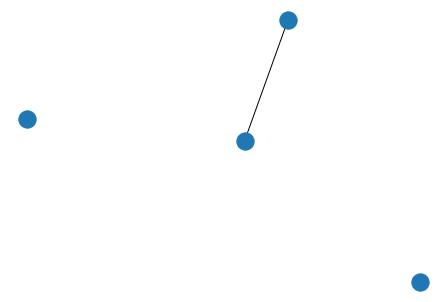

In [67]:
>>> nx.draw(G)

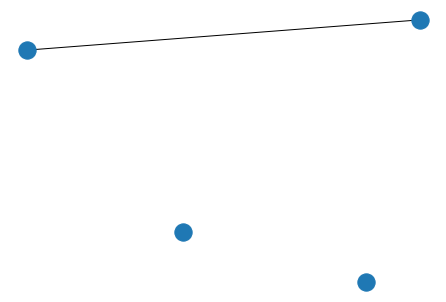

In [68]:
>>> nx.draw_random(G)

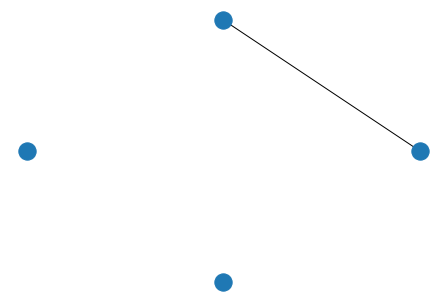

In [69]:
>>> nx.draw_circular(G)

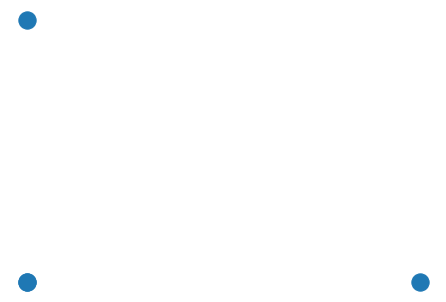

In [70]:
>>> nx.draw_spectral(G)

Обратите внимание, что в зависимости от подключения может протебоваться использование дополнительной команды отображения:

    >>> plt.show()

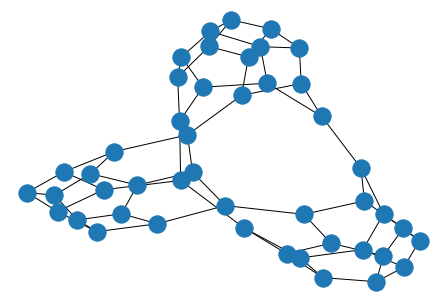

In [71]:
>>> nx.draw(tutte)

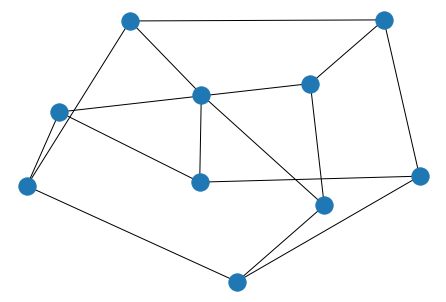

In [72]:
>>> nx.draw(petersen)

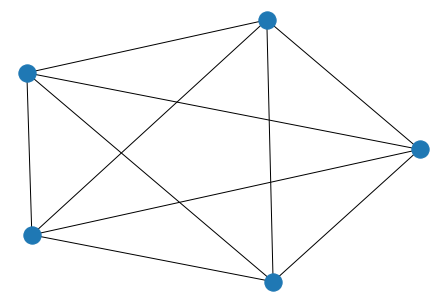

In [73]:
>>> nx.draw(K_5)

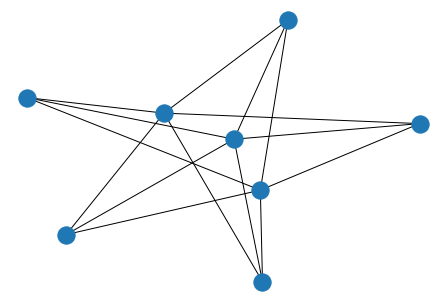

In [74]:
>>> nx.draw(K_3_5)

Изображения можно сохранять в файл, например:

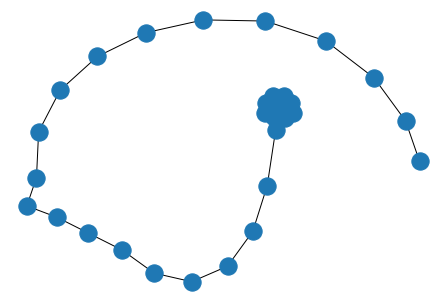

In [75]:
>>> nx.draw(lollipop)

In [76]:
>>> plt.savefig("path.png")

<Figure size 432x288 with 0 Axes>

запишет файл `path.png` в текущую локальную директорию.

Также, если в системе установлен `Graphviz` `PyGraphviz` или `pydot`, можно использовать следующие функции:

Создадим тетраграф:

In [77]:
>>> tet=nx.tetrahedral_graph()

для большей наглядности посмотрим на список его вершин и ребер:

In [78]:
>>> tet.nodes()

NodeView((0, 1, 2, 3))

In [79]:
>>> tet.edges()

EdgeView([(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)])

Теперь отрисуем его и сохраним файл на диск:

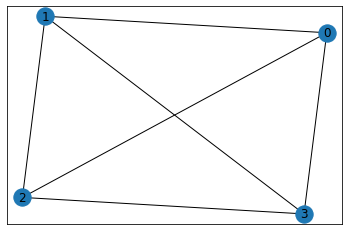

In [80]:
>>> nx.draw_networkx(tet)

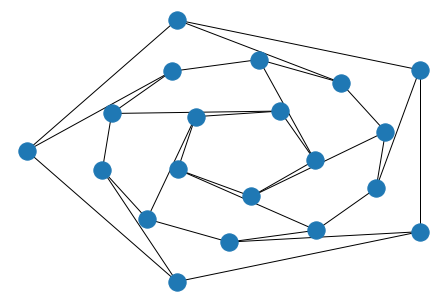

In [81]:
G = nx.dodecahedral_graph()

shells = [[2, 3, 4, 5, 6], [8, 1, 0, 19, 18, 17, 16, 15, 14, 7], [9, 10, 11, 12, 13]]

nx.draw_shell(G, nlist=shells)

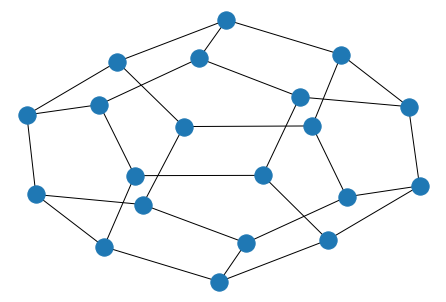

In [82]:
nx.draw(G)

plt.savefig("path.png")

### Индивидуальное задание

#### Базовая работа с графами

Задайте переменную `spisok`, в которую занесите любые семь элементов из следующего набора данных (выбирается согласно варианту):

1. Список дней недели.

2. Список из семи любых фамилий студентов, присутствующих в аудитории.

3. Список из семи любых названий месяцев.

4. Список из семи любых имен студентов, присутствующих в аудитории. 

5. Список из семи любых названий предметов в расписании. 

6. Список из семи любых предметов в вашем рюкзаке. 

7. Название любых семи улиц города.

8. Название любых семи городов.

9. Название любых семи марок автомобилей.

10. Название любых семи деталей компьютера.

11. Название любых семи фильмов.

12. Название любых семи стран.


* Создайте граф G,включающий в себя все элементы списка в виде вершин

* Соедините связями первый, третий, четвертый, последний и предпоследний элементы графа G

* Создайте графы G1,G2,G3 разделив список элементов на три части - в G1 должны входить первые три элемента, в G2 - один, в G3 - тоже три.

* Создайте новый граф G_all, в который бы в виде элементов входили три графа из предыдущего задания (G1,G2,G3)

* Соедините связями первую и последнюю вершину в графе G_all

* Добавьте к графу G_all еще одну, любую вершину

* Добавьте еще одну, любую вершину к любому из субграфов G_all (то есть в G1,G2 или в G3)

* Удалите из графа G_all все субграфы и вершины кроме первого

**Обратите внимание**: до и после каждого действия следует проверять его результаты, распечатывая списки вершин и ребер графов.

* визуализируйте графы G_all, G1, G2, G3 средствами matplotlib

* визуализируйте графы G_all, G1, G2, G3 средствами graphviz (через pygraphviz - как это продемонстрировано выше) - приведите .png и .dot файлы в отчете